In [1]:
### Import dynamic simulations 

### Bring in CCLE data
from PathLoader import PathLoader
from DataLink import DataLink 
path_loader = PathLoader('data_config.env', 'current_user.env')
TheLink = DataLink(path_loader, 'data_codes.csv')
dynamic_data = TheLink.get_data_from_code('dynamic_simulation_data')

### Plot a specific specie in a specifc cell line

In [25]:
# function to select cellline from dynamic data 

cellline = 'ACH-001113'
specie = 'INSR'

selected_data = dynamic_data[dynamic_data['Cellline'] == cellline]
selected_data.head()


,Cellline,Time,INSR,INSRpY,IRS,IRSi,S6KpT389,PI3K,INSRccIRSccPI3K,PDK1,...,RBp,RBpp,E2FccRB,E2FccRBp,E2FccRBpp,CDK46ccCYCDccP21,CDK46ccCYCDccP27,CDK2ccCYCEccP21,CDK2ccCYCEccP27,CDK2ccCYCEccP27p
0,ACH-001113,1,520.582691,1.025712,14.895045,841.234700,66.310241,452.624757,0.011378,275.679449,...,11.078342,177.432464,1.957924,418.582619,0.004415,281.288640,234.960774,104.382196,2.946210,0.002417
1,ACH-001113,2,520.259338,0.177857,128.244349,726.714189,6.685797,452.619149,0.016986,275.678875,...,2.994683,226.256336,266.893789,113.568781,0.022160,0.002902,506.589547,112.445563,2.126252,0.001744
2,ACH-001113,3,520.268326,0.201012,112.800134,742.190546,7.737442,452.619249,0.016885,275.678885,...,2.621340,268.446041,238.947906,99.821154,0.020620,0.002835,507.099092,117.306612,2.260340,0.001854
3,ACH-001113,4,520.272259,0.210970,107.370995,747.633577,8.180216,452.619266,0.016869,275.678887,...,2.335707,301.003963,217.334658,89.228087,0.019278,0.002778,507.410442,120.914807,2.370465,0.001945
4,ACH-001113,5,520.274104,0.215485,105.232364,749.778568,8.367511,452.619248,0.016887,275.678885,...,2.117821,325.870565,200.851910,81.101948,0.018171,0.002727,507.648593,123.586819,2.462432,0.002020


In [26]:
specie_data = selected_data[specie]
print(specie_data.shape, type(specie_data))
specie_data.head()

(3000,) <class 'pandas.core.series.Series'>


0    520.582691
1    520.259338
2    520.268326
3    520.272259
4    520.274104
Name: INSR, dtype: float64

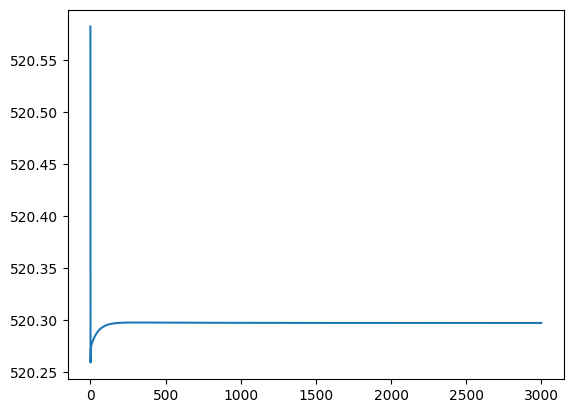

In [27]:
# plot the data

import matplotlib.pyplot as plt

plt.plot(specie_data)
plt.show()

### Plot all cell lines for one specie

In [19]:
# selecting dynamic simulations for one protein specie across all cell lines

specie = 'IRS'

selected_data = dynamic_data[['Cellline', 'Time', specie]]

In [20]:
selected_data.shape

(30000, 3)

In [21]:
selected_data.head()

,Cellline,Time,IRS
0,ACH-001113,1,14.895045
1,ACH-001113,2,128.244349
2,ACH-001113,3,112.800134
3,ACH-001113,4,107.370995
4,ACH-001113,5,105.232364


In [22]:
# transform the data to have time as columns and cell lines as rows

pivoted_data = selected_data.pivot(index='Cellline', columns='Time', values=specie)

In [23]:
pivoted_data.head(10)

Time,1,2,3,4,5,6,7,8,9,10,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,3000
Cellline,,,,,,,,,,,,,,,,,,,,,
ACH-000233,0.974677,24.660414,21.332900,19.514345,18.427432,17.735683,17.271354,16.943337,16.699434,16.508716,...,13.116113,13.116113,13.116113,13.116113,13.116113,13.116113,13.116114,13.116114,13.116114,13.116114
ACH-000242,97.820953,513.429746,460.586539,443.377889,437.296319,435.001115,434.034270,433.540184,433.216935,432.957454,...,422.387768,422.387769,422.387770,422.387770,422.387771,422.387772,422.387773,422.387774,422.387774,422.387775
ACH-000327,14.417218,117.360416,103.799402,97.380341,94.081087,92.285043,91.250441,90.612425,90.184791,89.870626,...,82.224004,82.224005,82.224005,82.224006,82.224007,82.224007,82.224008,82.224009,82.224009,82.224010
ACH-000461,13.763181,141.929898,125.130040,118.446176,115.483584,114.033620,113.226606,112.700499,112.300938,111.961381,...,100.814859,100.814860,100.814861,100.814862,100.814863,100.814864,100.814865,100.814866,100.814867,100.814868
ACH-000705,52.265796,357.229372,320.502440,309.788466,306.329992,305.072434,304.501854,304.149952,303.870416,303.617354,...,292.658289,292.658290,292.658292,292.658293,292.658295,292.658296,292.658297,292.658299,292.658300,292.658301
ACH-000708,15.904888,119.571542,105.395227,99.345806,96.505442,95.066492,94.269048,93.773082,93.421927,93.142381,...,84.826325,84.826326,84.826327,84.826327,84.826328,84.826328,84.826329,84.826330,84.826330,84.826331
ACH-001113,14.895045,128.244349,112.800134,107.370995,105.232364,104.289759,103.799863,103.485713,103.242195,103.029105,...,95.128335,95.128335,95.128336,95.128337,95.128338,95.128339,95.128340,95.128341,95.128342,95.128343
ACH-001289,6.288528,77.130336,68.097676,64.120892,62.183190,61.152212,60.544158,60.139305,59.834908,59.582221,...,52.331658,52.331659,52.331660,52.331661,52.331662,52.331663,52.331663,52.331664,52.331665,52.331666
ACH-001339,24.235251,368.165555,327.978063,306.265351,293.739338,286.225390,281.596550,278.682914,276.809517,275.575110,...,264.920078,264.920082,264.920086,264.920090,264.920094,264.920098,264.920102,264.920106,264.920110,264.920114


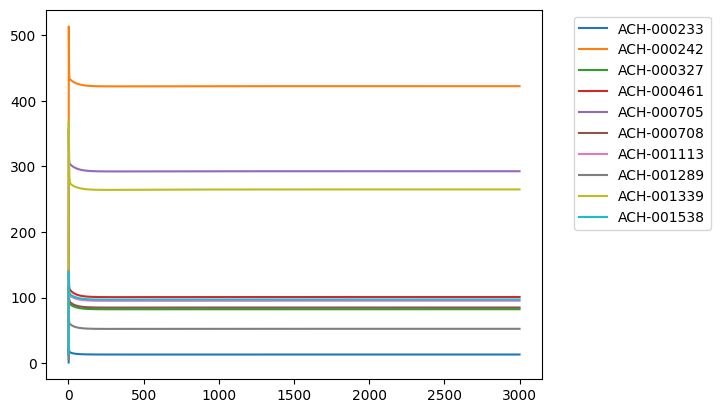

In [33]:
import matplotlib.pyplot as plt

# plot every cell line
for cellline in pivoted_data.index:
    plt.plot(pivoted_data.loc[cellline])
    # label the plot
    
plt.legend(pivoted_data.index, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Select all species for one cell line

In [34]:
cellline = 'ACH-001113'
selected_data = dynamic_data[dynamic_data['Cellline'] == cellline]

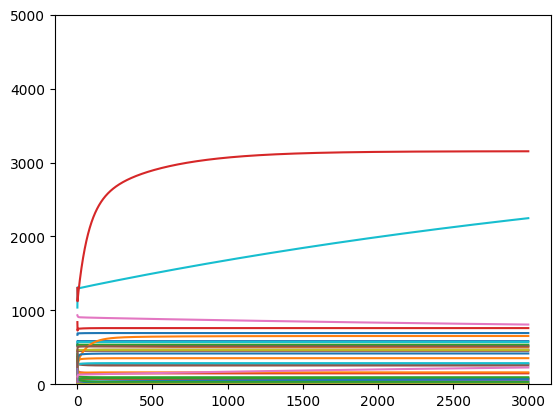

In [39]:
import matplotlib.pyplot as plt

for specie in selected_data.columns[2:]:
    plt.plot(selected_data['Time'], selected_data[specie])
    
# plt.legend(selected_data.columns[2:], bbox_to_anchor=(1.05, 1), loc='upper left')

# show within y range of 0 to x, a visually useful range
plt.ylim(0,5000)
plt.show()